The training dataset has 1460 rows and 81 columns
The test dataset has 1459 rows and 80 columns
Skewness of SalePrice is 1.8828757597682129
Skewness of SalePrice is 0.12133506220520406
There are 38 numeric data columns and 43 categorical data columns in the dataset


/home/rishav/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Top 15 correlation values are :
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64
Least 5 correlation values are :
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64
             SalePrice
OverallQual           
1                50150
2                60000
3                86250
4               108000
5               133000
6               160000
7               200141
8               269750
9               345000
10              432390


/home/rishav/.local/lib/python3.5/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Id                  2127
MSSubClass            60
MSZoning              RM
LotFrontage           57
LotArea             8094
Street              Pave
Alley               Grvl
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood     OldTown
Condition1          Norm
Condition2          Norm
BldgType          2fmCon
HouseStyle        2.5Unf
OverallQual            6
OverallCond            8
YearBuilt           1910
YearRemodAdd        1983
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      Wd Sdng
Exterior2nd      Wd Sdng
MasVnrType          None
MasVnrArea             0
ExterQual             TA
ExterCond             TA
Foundation         PConc
                  ...   
HalfBath               0
BedroomAbvGr           5
KitchenAbvGr           1
KitchenQual           TA
TotRmsAbvGrd           8
Functional           Typ
Fireplaces             0
FireplaceQu          NaN
GarageType        Detchd


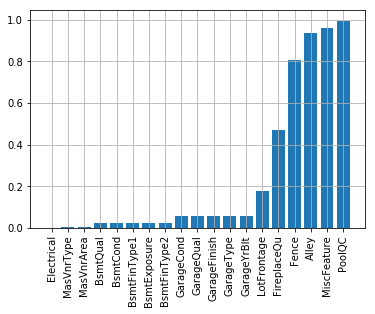

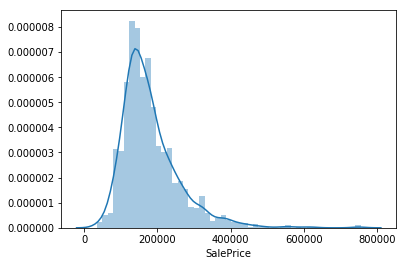

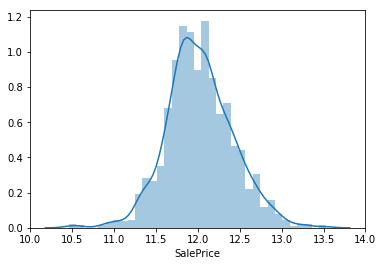

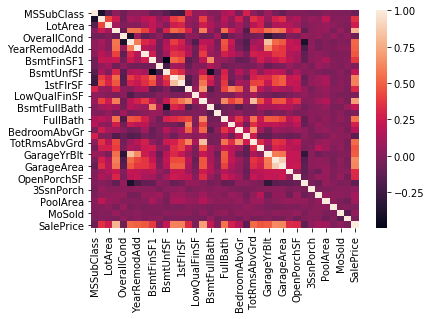

<Figure size 432x288 with 0 Axes>

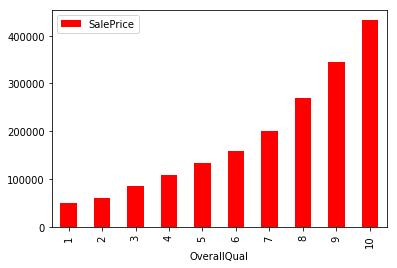

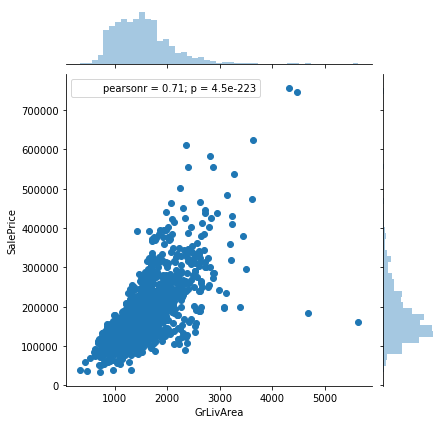

In [3]:
# Loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading train and test data
train=pd.read_csv('train.csv')
test=pd.read_csv('test(1).csv')

# Printing the number of rows and columns in the dataset
print('The training dataset has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print('The test dataset has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

# Calculating and printing percentage of missing values in each column
b=train.columns[train.isnull().any()]
miss=train.isnull().sum()/len(train)
miss=miss[miss>0]
miss.sort_values(inplace=True)
#print(miss)

# Visualising missing values
plt.grid(True)
plt.xticks(rotation=90)
plt.bar(miss.index,miss)

# checking the distribution of target value SalePrice
plt.figure(2)
sns.distplot(train['SalePrice'])

# Finding skewness in the target variable
print('Skewness of SalePrice is {0}'.format(train['SalePrice'].skew()))

# Apply Log transform on the target variable to remove positive skewness and get it closer to normal distribution
target=np.log(train['SalePrice'])
print('Skewness of SalePrice is {0}'.format(target.skew()))
plt.figure(3)
sns.distplot(target)

# Separate variables into different dataframes
numeric_data=train.select_dtypes(include=[np.number])
cat_data=train.select_dtypes(exclude=[np.number])

# Printing the number of columns in numeric and categorical data respectively
print("There are {0} numeric data columns and {1} categorical data columns in the dataset".format(numeric_data.shape[1],cat_data.shape[1]))

# Deleting useless column for modeling
del numeric_data['Id']

# Correlation Plotting
plt.figure(4)
cor=numeric_data.corr()
# print(corr)
sns.heatmap(cor)

# Getting top 15 and least 5 correlated values
print('Top 15 correlation values are :')
print(cor['SalePrice'].sort_values(ascending=False)[:15])
print('Least 5 correlation values are :')
print(cor['SalePrice'].sort_values(ascending=False)[-5:])

# Checking the mean price per Quality and plotting it
pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
print(pivot)
plt.figure(5)
pivot.plot(kind='bar',color='red')

# Checking the jointplot between LivingArea and SalePrice
plt.figure(6)
sns.jointplot(x=train['GrLivArea'],y=train['SalePrice'])

# Understanding Categorical Variables
cat_data.describe()

# Appending SalePrice Column to cat_data for analysis
cat_data['SalePrice'] = train.SalePrice.values

# Removing outiers as seen from the jointplot between SalePrice and GrLivArea
train.drop(train[train['GrLivArea']>4000].index, inplace=True)

test.loc[666]